<a href="https://colab.research.google.com/github/KatBotkowska/Charity_donation/blob/master/Warsztaty_WiT_4_modelowanie_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WARSZTAT NR 4**

### **Podstawy modelowania w Pythonie**

Do modelowania w Pythonie służą między innymi biblioteki <span style="background-color:yellow">**scikit-learn**</span> zawierająca algorytmy klasyfikacji, regresji i klastrowania oraz <span style="background-color:yellow">**statsmodels**</span> pozwalająca szacować modele statystyczne i przeprowadzać testy statystyczne.

Dziś zajmiemy się modelem regresji liniowej, który pozwala dopasować liniową krzywą regresji do danych pomiarowych. Zakładamy, że pomiędzy X (zmienną/zmiennymi niezależnymi) a y (zmienną zależną, którą chcemy przewidywać) istnieje liniowa zależność.

Dokumentacja:

scikit-learn https://scikit-learn.org/stable/

statsmodels https://www.statsmodels.org/stable/index.html

Typy regresji:
    
- liniowa https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Ridge https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- Elastic Net https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Kolejne kroki:

- Konstruujemy y - zmienną zależną,
- Konstruujemy macierz X zmiennych niezależnych,
- Dodajemy stałą (intercept), tj. oczekiwaną wartość średnią y dla X = 0,
- Modelowanie regresji,
- Analiza/wizualizacja wyników,
- Ewentualnie: tuning modelu...

In [2]:
# Na początek importujemy potrzebne biblioteki.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # importujemy jako 'plt', dla uproszczenia
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn.metrics as metrics
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
#podłączenie google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')
data_2=pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Changping_20130301-20170228.csv', sep=',')
data_3 = pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Tiantan_20130301-20170228.csv', sep=',')

In [4]:
# Importujemy i przygotowujemy potrzebne zbiory danych.
#data = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')
data.rename({'PM2.5': 'PM2_5'}, axis=1, inplace=True)
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['PM2_5'].fillna(data['PM2_5'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].median(), inplace=True)
data['NO2'].fillna(data['NO2'].mean(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)

In [5]:
data2015 = data.loc[data['year'] == 2015]
data2015

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16104,16105,2015,1,1,0,13.0,50.0,19.0,29.0,500.0,28.0,-1.0,1027.0,-22.4,0.0,NNW,4.4,Aotizhongxin
16105,16106,2015,1,1,1,11.0,30.0,15.0,31.0,600.0,27.0,-1.0,1027.0,-23.7,0.0,N,5.6,Aotizhongxin
16106,16107,2015,1,1,2,13.0,33.0,16.0,32.0,600.0,26.0,-1.0,1028.0,-23.7,0.0,N,4.2,Aotizhongxin
16107,16108,2015,1,1,3,10.0,29.0,10.0,25.0,500.0,31.0,-1.0,1029.0,-24.4,0.0,N,4.4,Aotizhongxin
16108,16109,2015,1,1,4,12.0,25.0,14.0,33.0,700.0,24.0,-2.0,1027.0,-23.2,0.0,ENE,1.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24859,24860,2015,12,31,19,98.0,148.0,28.0,119.0,2600.0,7.0,-1.4,1026.3,-8.6,0.0,E,1.0,Aotizhongxin
24860,24861,2015,12,31,20,98.0,165.0,24.0,113.0,3300.0,8.0,-2.5,1026.2,-8.4,0.0,E,1.3,Aotizhongxin
24861,24862,2015,12,31,21,107.0,187.0,27.0,117.0,4000.0,10.0,-2.7,1025.8,-8.0,0.0,ENE,0.9,Aotizhongxin
24862,24863,2015,12,31,22,150.0,228.0,38.0,129.0,4900.0,12.0,-3.5,1025.5,-7.6,0.0,ENE,0.4,Aotizhongxin


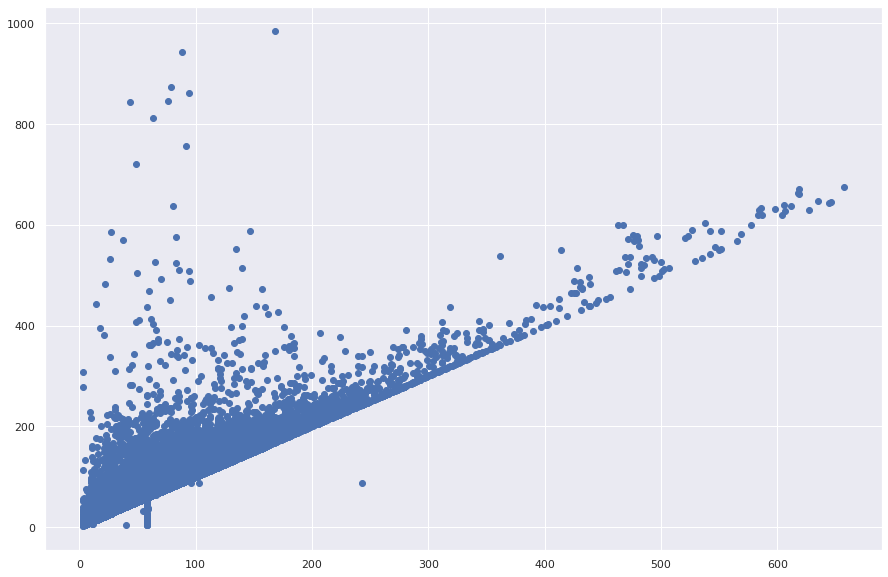

In [6]:
# Przypomnijmy sobie związek pomiędzy PM2.5 a PM10 w 2015 roku...
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,10))
plt.scatter(data2015.PM2_5,data2015.PM10);

Przykład prostej regresji liniowej ze scikit-learn:

y = c + a*x

In [ ]:
# Teraz dopasujemy krzywą regresji opisującą tę zależność.
x = data2015['PM2_5'].values[:,np.newaxis]
y = data2015['PM10'].values

# Model regresji liniowej:
model = LinearRegression()
model.fit(x, y) # dopasowanie
y_pred = model.predict(x)

# Podsumowanie modelu: 
r2 = metrics.r2_score(y, y_pred)
print('r2: ', r2)
mae = metrics.mean_absolute_error(y, y_pred) 
print('MAE: ', mae)
mse = metrics.mean_squared_error(y, y_pred) 
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

In [ ]:
# Sprawdźmy na wykresie efekty dopasowania.
plt.figure(figsize=(15,10))
plt.scatter(x, y) # wykres punktowy zależności PM2.5 oraz PM10
plt.plot(x, y_pred, 'k') # dopasowana krzywa regresji
plt.show()

Przykład ze statsmodels:

In [ ]:
# Inne podejście: Ordinary Least Squares
x = data2015['PM2_5'].values
x2 = sm.add_constant(x) # Ważne, aby nie używać tego samego x - przyda się nam do wizualizacji!
y = data2015['PM10'].values
model = sm.OLS(y, x2, missing='drop')
result = model.fit()
print(result.summary())

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(x, y) # wykres punktowy zależności PM2.5 oraz PM10
plt.plot(x, result.fittedvalues, 'k') # dopasowana krzywa regresji

In [ ]:
# Kiedy nie chcemy tworzyć modelu, tylko podejrzeć trend...
plt.figure(figsize=(15,10))
sns.regplot(x='PM2_5', y='PM10', data=data2015, scatter_kws={"color": "green"}, line_kws={"color": "black"});

Przykład regresji liniowej dla macierzy zmiennych niezależnych X:

y = c + a1 * x1 + a2 * x2 + a3 * x3 ...


In [ ]:
# Próbujemy przewidywać wartości PM10, znając wartości PM2.5, SO2 i NO2.
x = data2015[['PM2_5', 'SO2', 'NO2']]
x = sm.add_constant(x)
y = data2015['PM10']
model = sm.OLS(y, x, missing='drop')
result = model.fit()
print(result.summary())

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y, label="real")
plt.plot(result.fittedvalues, label="predicted")
plt.legend()
plt.axis([16250,16750,0,600]);

# **Podstawy Machine Learning z scikit**

https://scikit-learn.org/stable/

https://medium.com/codex/customer-segmentation-with-k-means-in-python-18336fb915be

In [ ]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plt.rcParams['figure.figsize'] = (20, 10) #https://matplotlib.org/stable/tutorials/introductory/customizing.html
plt.style.use('ggplot')
sb.set_style('whitegrid')

In [ ]:
data

In [ ]:
data = data.iloc[:,6:11]
data

In [ ]:
data.describe()

In [ ]:
# Standaryzujemy date
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
data_s = StandardScaler().fit_transform(data)
data

### **PCA**

https://scikit-learn.org/stable/modules/decomposition.html#decompositions

In [ ]:
pca = PCA(n_components=3) #PCA z trzema zmiennymi 
data_r = pca.fit(data_s).transform(data_s)

In [ ]:
data_r

In [ ]:
data_princ = pd.DataFrame(data = data_r, columns = ['principal_com_1', 'principal_com_2','principal_com_3'])
data_princ

In [ ]:
pca.explained_variance_ratio_ #wyjaśniamy 59+19+12 = 90% wariancji przy pomocy 3 kolumn zamiast 5

In [ ]:
pca.n_components_  #atrybuty obiektu PCA #TAB

# **K-means**

https://scikit-learn.org/stable/modules/clustering.html #k-means

In [ ]:
clusters = 3 # na ile grup dzielimy zbiór?
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(data_princ)

labels = model.labels_

In [ ]:
labels

In [ ]:
data['cluster_num'] = labels
data.head()

In [ ]:
#podsumujmy dane i sprawdźmy jakie stworzyły się grupy
data.groupby('cluster_num').mean()

In [ ]:
sb.scatterplot('PM10', 'O3', 
               data = data, 
              # s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')